# RFM и CLV-анализ клиентской базы банка

**Описание проекта:**
1. Проект направлен на понимание поведения клиентов банка, выявление причин оттока и оценку их ценности.
2.  С помощью метрик удержания, CLV и RFM-анализa выделены ключевые сегменты клиентов, что позволяет оптимизировать маркетинговые стратегии и повысить доход банка.

**Цель исследования:**
1. Проанализировать отток клиентов и выявить ключевые факторы, влияющие на уход.
2. Рассчитать и визуализировать метрики удержания для разных групп клиентов.
3. Оценить ценность клиентов (CLV) и выявить наиболее ценные сегменты.
4. Сегментировать клиентов (RFM-анализ) для разработки стратегий удержания и повышения дохода.
   
**Общий вывод:**
1.  Основные факторы ухода: низкий баланс, малое количество продуктов, география и возраст. Даже при среднем или высоком CLV неактивность повышает риск ухода.  
2. Наибольший Retention наблюдается у VIP и Loyal клиентов, что подтверждает их высокую ценность для банка.
Наименьший Retention характерен для At Risk и Potential сегментов, что указывает на необходимость удерживающих мер и целевых маркетинговых кампаний.
3. Банк теряет клиентов с высокой пожизненной ценностью, что свидетельствует о риске потери наиболее прибыльного сегмента. Необходимо усилить стратегию удержания клиентов с высоким балансом.
4. Клиенты сегментированы по активности (Recency), использованию продуктов (Frequency) и ценности (CLV).
Выделены сегменты: VIP, Loyal, Potential, At Risk.
VIP и Loyal приносят наибольший доход, At Risk и Potential требуют удержания и стимулирования.
Сегментация помогает приоритизировать маркетинг и повысить доход банка.

**Дизайн эксперимента и анализ данных:**
1. Анализ данных
2. Рассчет оттока клиентов и выявление ключевых факторов
3. Определение метрик
4. Средний доход с клиента за период (CLV)
5. RFM-анализ
6. Вывод




In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Открытие данных
data = pd.read_csv(r"C:\Users\Денис\Desktop\Churn_Modelling\Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. RowNumber: Порядковый номер, присвоенный каждой строке в наборе данных.
2. CustomerId: Идентификатор клиента
3. Surname: Фамилия
4. CreditScore: Кредитный рейтинг
5. Geography: География
6. Gender: Пол
7. Age: Возраст
8. Tenure: Стаж работы
9. Balance: Остаток на счете клиента.
10. NumOfProducts: Количество банковских продуктов, которыми пользуется клиент.
11. HasCrCard: Указывает, есть ли у клиента кредитная карта (двоичное значение: да/нет).
12. IsActiveMember: Указывает, является ли клиент активным участником программы (двоичное значение: да/нет).
13. EstimatedSalary: Предполагаемая заработная плата клиента
14. Exited: Указывает, вышел ли клиент из банка (двоичное значение: да/нет).


In [14]:
# Проверка на дубликаты
data.duplicated().sum()

np.int64(0)

In [13]:
data.inf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Рассчет оттока клиентов и выявление ключевых факторов
В банках почти всегда считают несколько видов оттока, потому что «уход» может означать разные вещи — и управляются они по-разному. Ниже — основные типы:
- Клиентский churn
- Product churn
- Balance churn
- Geography	churn
- Gender churn
- Age churn

В этом датасете нет временных данных, поэтому считаем общий исторический отток.

In [237]:
# 1.Клиентский отток 

# общее число клиентов
total_customers = len(data)

# число ушедших
churned_customers = data["Exited"].sum()

# коэффициент оттока в процентах
customer_churn = round((churned_customers / total_customers) * 100, 2)
customer_churn

np.float64(20.37)

In [124]:
# 2.Product churn (продукты ушедших клиентов) / (все продукты)
product_churn = (data.loc[data["Exited"] == 1, "NumOfProducts"].sum() / data["NumOfProducts"].sum()) 
# В процентах
product_churn_p = round(product_churn * 100, 2)
product_churn_p

np.float64(19.64)

In [125]:
# 3. Balance churn (баланс ушедших клиентов) / (все балансы)
balance_churn = (data.loc[data["Exited"] == 1, "Balance"].sum() / data["Balance"].sum())

# В процентах
balance_churn_p = round(balance_churn * 100, 2)
balance_churn_p


np.float64(24.26)

In [126]:
# Создаем DataFrame
churn_df = pd.DataFrame({
    "Balance Churn": [balance_churn_p],
    "Product Churn": [product_churn_p],
    "Customer Churn": [customer_churn]
})
churn_df

,Balance Churn,Product Churn,Customer Churn
0,24.26,19.64,20.37


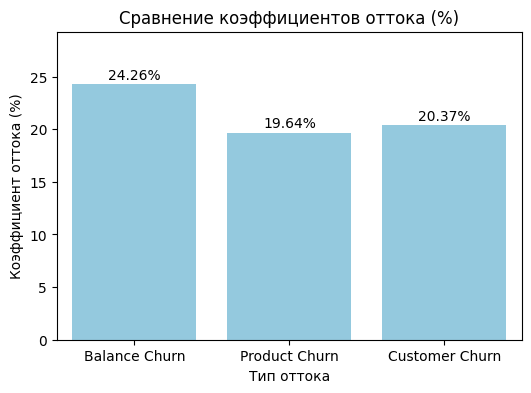

In [127]:
# Данные
churn_data = pd.DataFrame({
    "Тип оттока": ["Balance Churn", "Product Churn", "Customer Churn"],
    "Коэффициент (%)": [24.26, 19.64, 20.37]
})

# Столбчатый график
plt.figure(figsize=(6,4))
sns.barplot(x="Тип оттока", y="Коэффициент (%)", data=churn_data, color="skyblue", errorbar=None)

# Добавим значения процентов сверху столбцов
for index, row in churn_data.iterrows():
    plt.text(index, row["Коэффициент (%)"] + 0.5, f'{row["Коэффициент (%)"]:.2f}%', ha='center')

plt.title("Сравнение коэффициентов оттока (%)")
plt.ylabel("Коэффициент оттока (%)")
plt.xlabel("Тип оттока")
plt.ylim(0, churn_data["Коэффициент (%)"].max() + 5)
plt.show()

In [128]:
# Geography	churn  
geograhy_churn = data.groupby("Geography")["Exited"].mean()

geograhy_churn_p = round(geograhy_churn * 100, 2)
geograhy_churn_p


Geography
France     16.15
Germany    32.44
Spain      16.67
Name: Exited, dtype: float64

In [129]:
# Gender churn
gender_churn = data.groupby("Gender")["Exited"].mean()

gender_churn_p = round(gender_churn * 100,2)
gender_churn_p

Gender
Female    25.07
Male      16.46
Name: Exited, dtype: float64

In [130]:
# Age churn
bins = [18,30,40,50,60,100]
data["age_group"] = pd.cut(data["Age"], bins )

data.groupby("age_group", observed=True)["Exited"].mean()

age_group
(18, 30]     0.075026
(30, 40]     0.120872
(40, 50]     0.339655
(50, 60]     0.562108
(60, 100]    0.247845
Name: Exited, dtype: float64

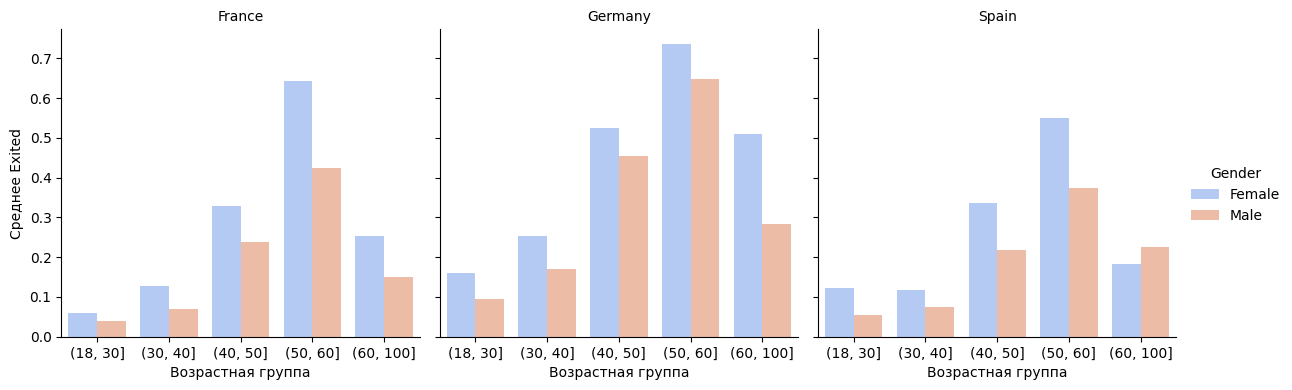

In [131]:
# Создаём таблицу churn по возрастным группам
import matplotlib.pyplot as plt
import seaborn as sns

# Группировка по возрасту, полу и стране
age_churn = data.groupby(["age_group", "Gender", "Geography"], observed=True)["Exited"].mean().reset_index()


g = sns.catplot(
    x="age_group",
    y="Exited",
    hue="Gender",
    col="Geography",     
    data=age_churn,
    kind="bar",
    palette="coolwarm",
    height=4,
    aspect=1
)

g.set_axis_labels("Возрастная группа", "Среднее Exited")
g.set_titles("{col_name}")
plt.show()

**Промежуточный вывод:**
1. Основной фактор оттока — низкий баланс на счету и низкая активность по продуктам.
2. Основная группа оттока - это женщины 50 - 60 лет из региона Germany, France, Spain.

# Метрики
- Retention rate
- CLV (Customer Lifetime Value)
- RFM-анализ


1. Retention rate

In [132]:
# Расчет Retention rate в процентах - колличество оставшихся 

# общее число клиентов
total_customers = len(data)

# число ушедших
churned_customers = data["Exited"].sum()

# коэффициент оставшихся в процентах
customer_rate = (total_customers - churned_customers ) 
retention_rate = round((customer_rate / total_customers) * 100, 2)
retention_rate

np.float64(79.63)

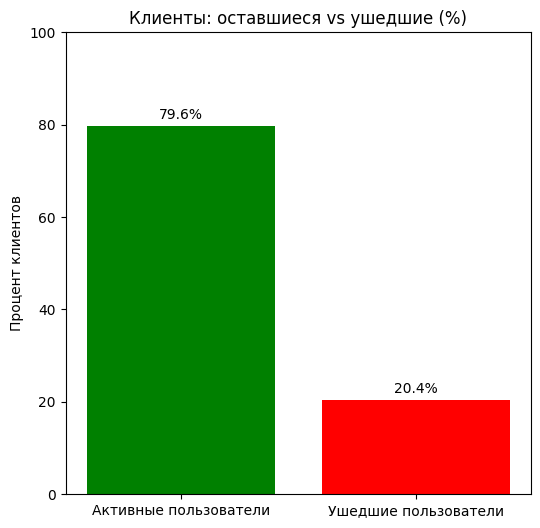

In [157]:
# Данные для графика


labels = ['Активные пользователи', 'Ушедшие пользователи']
values = [retention_rate, customer_churn]

colors = ['green', 'red']

# Построение графика
plt.figure(figsize=(6,6))
bars = plt.bar(labels, values, color=colors)

# Подписи с точным процентом
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width()/2,  # по центру столбца
        value + 1,                        # чуть выше вершины
        f'{value:.1f}%',                  # формат с 1 знаком после запятой
        ha='center', va='bottom'
    )

plt.title('Клиенты: оставшиеся vs ушедшие (%)')
plt.ylabel('Процент клиентов')
plt.ylim(0, 100)
plt.show()

**Промежуточный вывод:** Общий Retention Rate составляет 79.6%, что означает, что 4 из 5 клиентов остаются в банке за выбранный период.

2. CLV (Customer Lifetime Value) - Средний доход с клиента за период
- зададим маржу банка в 10% 

In [238]:
# средний доход 
avg_balance = data[data["Exited"] == 1]["Balance"].mean()
avg_balance 

np.float64(91108.53933726068)

In [239]:
# CLV оттока
margin = 0.10
CLV = (avg_balance * margin) / customer_churn
CLV = round(CLV * 100, 2) 
CLV

np.float64(44726.82)

In [240]:
# CLV актывных полььзователей
avg_balance_active = data[data["Exited"] == 0]["Balance"].mean()

CLV_a = (avg_balance_active * margin) / customer_churn
CLV_a = round(CLV_a * 100, 2) 
CLV_a

np.float64(35711.98)

In [224]:
# Колличество пользователей с нулевым балансом
(data["Balance"] == 0).sum()

np.int64(3617)

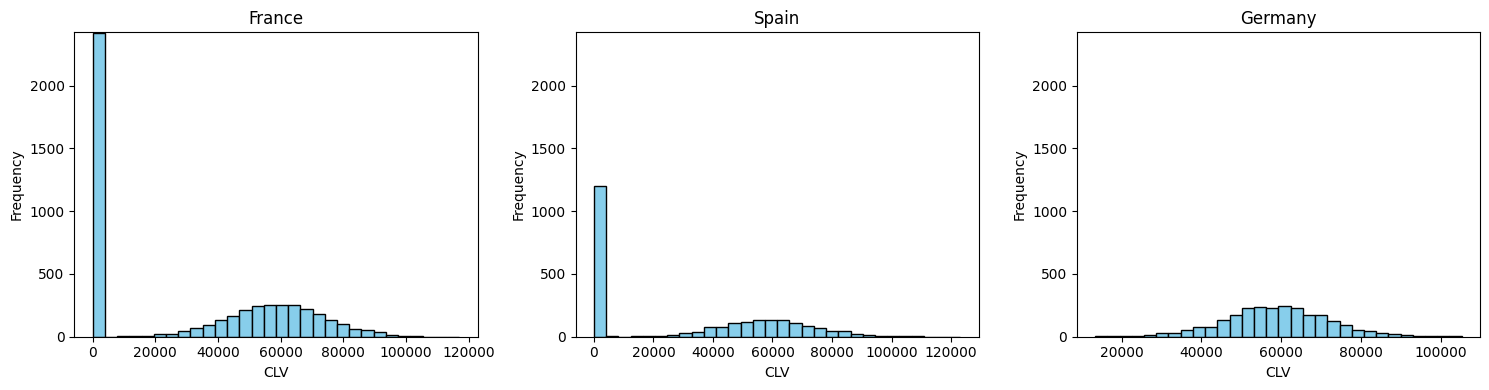

In [198]:
# График распределение CLV по странам
customer_churn = data["Exited"].mean()
data["CLV"] = (data["Balance"]* margin) / customer_churn
data.groupby("Geography")["CLV"].median()

countries = data["Geography"].unique()
num_countries = len(countries)

# Находим максимальную частоту среди всех стран, чтобы ось Y была одинаковой
max_freq = 0
for country in countries:
    subset = data[data["Geography"] == country]
    counts, _ = np.histogram(subset["CLV"], bins=30)
    max_freq = max(max_freq, counts.max())

plt.figure(figsize=(15, 4))

for i, country in enumerate(countries, 1):
    subset = data[data["Geography"] == country]
    
    plt.subplot(1, num_countries, i)
    plt.hist(subset["CLV"], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{country}")
    plt.xlabel("CLV")
    plt.ylabel("Frequency")
    plt.ylim(0, max_freq + 5)  # фиксируем ось Y для всех графиков

plt.tight_layout()
plt.show()

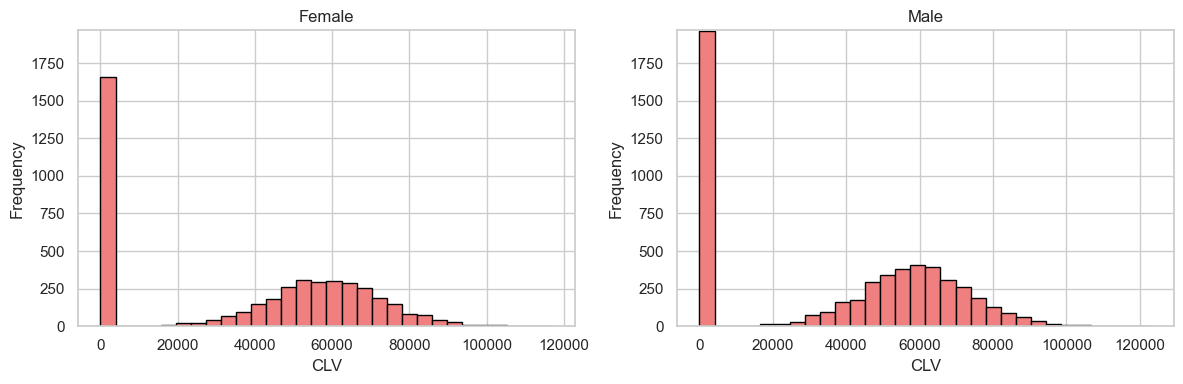

In [226]:
# График распределение CLV по полу
genders = data["Gender"].unique()
num_genders = len(genders)

# Находим максимальную частоту среди всех полов для одинаковой оси Y
max_freq = 0
for gender in genders:
    subset = data[data["Gender"] == gender]
    counts, _ = np.histogram(subset["CLV"], bins=30)
    max_freq = max(max_freq, counts.max())

plt.figure(figsize=(12, 4))

for i, gender in enumerate(genders, 1):
    subset = data[data["Gender"] == gender]
    
    plt.subplot(1, num_genders, i)
    plt.hist(subset["CLV"], bins=30, color='lightcoral', edgecolor='black')
    plt.title(f"{gender}")
    plt.xlabel("CLV")
    plt.ylabel("Frequency")
    plt.ylim(0, max_freq + 5)  # фиксируем ось Y одинаковой

plt.tight_layout()
plt.show()

**Промежуточный вывод:**
1. CLV у ушедших оказался выше (44 726), активные клиенты (35 711) — это означает, что:
- клиенты с высоким балансом тоже уходят
- банк теряет прибыльных клиентов

# RFM-анализ

**Цель:**
Сегментация клиентов банка по активности и ценности для выявления приоритетных групп для удержания и маркетинга.

**Метод:**
1. R (Recency): как давно клиент взаимодействует с банком (Tenure).
2. F (Frequency): сколько продуктов банка использует клиент.
3. M (Monetary): ценность клиента, измеряемая CLV.
4. Баллы по каждому показателю — от 1 до 5.

**Сегменты:**
1. VIP: самые ценные и активные клиенты, высокий CLV.
2. Loyal: лояльные клиенты с регулярной активностью.
3. Potential: средние показатели, есть потенциал для роста.
4. At Risk: клиенты с низкой активностью и ценностью, требуют удержания.


Таблица с количеством клиентов и средним CLV по сегментам

In [228]:
# Группировка по сегментам
segment_summary = rfm.groupby('Segment').agg(
    Number_of_Customers=('CustomerId', 'count'),
    Average_CLV=('CLV', 'mean')
).sort_values(by='Average_CLV', ascending=False)

segment_summary

,Number_of_Customers,Average_CLV
Segment,,
VIP,518,75483.985221
Loyal,4456,48615.058285
Potential,3347,30783.688480
At Risk,1679,9958.666668


График с количеством клиентов и средним CLV по сегментам

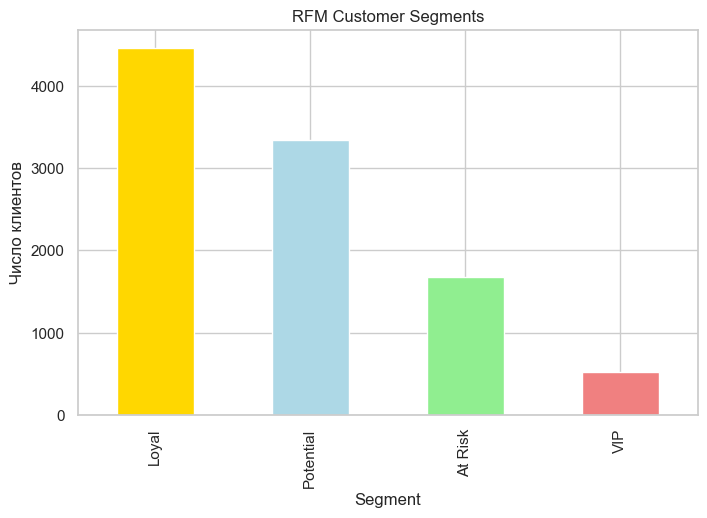

In [234]:
# Копируем данные
rfm = data.copy()

# Баллы R, F, M (от 1 до 5)
# Для Recency: чем меньше Tenure, тем выше балл
rfm['R_Score'] = pd.qcut(rfm['Tenure'], 5, labels=False, duplicates='drop')
rfm['R_Score'] = 5 - rfm['R_Score'] 

# Frequency: больше продуктов → выше балл
rfm['F_Score'] = pd.qcut(rfm['NumOfProducts'], 5, labels=False, duplicates='drop')

# Monetary: CLV
rfm['M_Score'] = pd.qcut(rfm['CLV'], 5, labels=False, duplicates='drop')
rfm['M_Score'] = rfm['M_Score'] + 1

# Суммарный RFM Score
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

# категории клиентов
def rfm_segment(row):
    if row['RFM_Score'] >= 9:
        return 'VIP'
    elif row['RFM_Score'] >= 6:
        return 'Loyal'
    elif row['RFM_Score'] >= 4:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

plt.figure(figsize=(8,5))
rfm['Segment'].value_counts().plot(kind='bar', color=['gold','lightblue','lightgreen','lightcoral'])
plt.title('RFM Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Число клиентов')
plt.show()

График зависимости сегмента от CLV и колличества клиентов

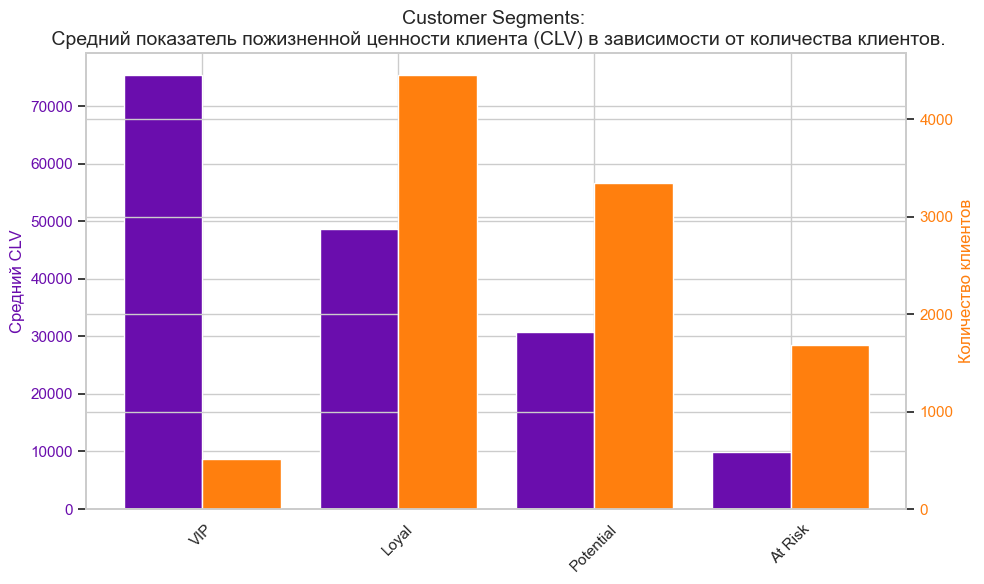

In [233]:
# Создаем фигуру
fig, ax1 = plt.subplots(figsize=(10,6))

# Позиции сегментов на оси X
x = np.arange(len(segment_summary.index))
width = 0.4  # ширина столбцов

# Столбцы для Average CLV
bar1 = ax1.bar(x - width/2, segment_summary['Average_CLV'], width, label='Average CLV', color='#6a0dad')
ax1.set_ylabel('Средний CLV', color='#6a0dad', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#6a0dad')

# Вторая ось для Number of Customers
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, segment_summary['Number_of_Customers'], width, label='Number of Customers', color='#ff7f0e')
ax2.set_ylabel('Количество клиентов', color='#ff7f0e', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Настроим подписи сегментов
ax1.set_xticks(x)
ax1.set_xticklabels(segment_summary.index, rotation=45)

plt.title('Customer Segments: \n Средний показатель пожизненной ценности клиента (CLV) в зависимости от количества клиентов.', fontsize=14)
fig.tight_layout()
plt.show()

**Промежуточный вывод:**
1. VIP и Loyal клиенты: небольшая группа, но приносят наибольший доход (CLV) и демонстрируют высокую активность.
2. Potential клиенты: большая группа со средними показателями, есть потенциал для роста дохода через стимулирующие акции и кросс-продажи.
3. At Risk клиенты: клиенты с низкой активностью и низким CLV; требуют удерживающих мер, чтобы снизить отток.
4.Графики показывают распределение клиентов по сегментам и CLV, что позволяет визуально оценить, какие сегменты стратегически важны для банка.